# 多元线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #绘制3D坐标的函数

In [2]:
x_path = '/home/blueberry/MachineLearning/Expriment/t2/ex2Data/ex2Data/ex2x.dat'
y_path = '/home/blueberry/MachineLearning/Expriment/t2/ex2Data/ex2Data/ex2y.dat'

In [3]:
x = open(x_path,'r+').readlines()
x = [ i.replace('\n','').split() for i in x]
xr = []
for x_ in x:
    x_ = [float(a) for a in x_]
    xr.append(x_)
x = xr
y = open(y_path,'r+').readlines()
y = [float(i.strip('\n')) for i in y]
x = np.array(x)
y = np.array(y)

## 归一化
- 归一化很重要，实验证明对之后的梯度下降影响非常之大
- 注意对矩阵的归一化对每一维度的特征：x（这里是列矩阵，列向量）求均值，求每维度的方差进行标准化

In [4]:
m = len(y)
x1 = x[:,0]
x2 = x[:,1]
x = np.array([np.ones(m),x1,x2])
x = x.T
##normalization
mu = np.array([np.mean(x[:,1]),np.mean(x[:,2])])
sigma = np.array([np.std(x[:,1]),np.std(x[:,2])])
print(sigma)
x[:,1] = (x[:,1] - mu[0])/sigma[0]
x[:,2] = (x[:,2] - mu[1])/sigma[1]

x1 = x[:,1]
x2 = x[:,2]
print(x.shape)


[  7.86202619e+02   7.52842809e-01]
(47, 3)


### 数据分布

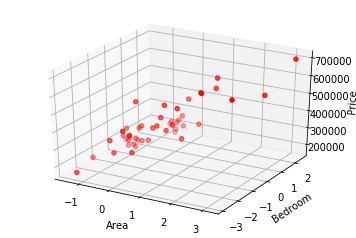

In [5]:
px, py, pz = x1, x2, y
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度

ax.scatter(px, py, pz, c='r')

ax.set_zlabel('Price')  # 坐标轴
ax.set_ylabel('Bedroom')
ax.set_xlabel('Area')
plt.show()

In [6]:
def predict(x,theta):
    return theta.dot(x.T)
def compute_loss(theta,x,y):
    J_vals  = (y - x.dot(theta)).T.dot(y-x.dot(theta))/(2*m)
    return J_vals

In [9]:
def gradient_decent(loss,alpha):
    theta = np.zeros(x.shape[1])
    this_loss = compute_loss(theta,x,y)
    loss.append(this_loss)
    this_loss = 0
    t1 = theta[0]
    t2 = theta[1]
    t3 = theta[2]
    for _ in range(50):
        loss.append(this_loss)
        new_theta = []
        ## 法1
    #     for j,t in enumerate(theta):
    #         for i in range(m):
    #             t = t + alpha * (y[i] - theta .dot( x[i,:])) * x[i,j]
    #         new_theta.append(t)
        ##法2
    #     theta = np.array(new_theta)
    #     t1 = t1 - alpha *np.sum((x.dot(theta)-y)*x[:,0])/m
    #     t2 = t2 - alpha *np.sum((x.dot(theta)-y)*x[:,1])/m
    #     t3 = t3 - alpha *np.sum((x.dot(theta)-y)*x[:,2])/m
    #     theta = np.array([t1,t2,t3])
        ##法3
        theta = theta - alpha * x.T.dot(x.dot(theta) - y)/m
        this_loss = compute_loss(theta,x,y)
    loss.remove(0)
    return theta

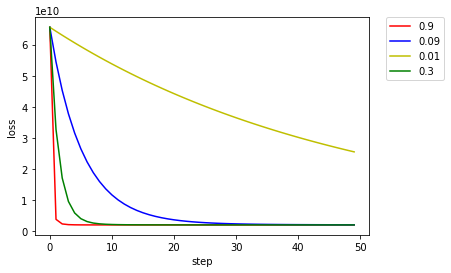

2043281446.93


In [10]:
loss = []
gradient_decent(loss,0.9)
loss_x = np.arange(0,len(loss),1)
p1 = plt.plot(loss_x,loss,'r-',label = '0.9')

loss = []
gradient_decent(loss,0.09)
loss_x = np.arange(0,len(loss),1)
p2 = plt.plot(loss_x,loss,'b-',label = '0.09')

loss = []
gradient_decent(loss,0.01)
loss_x = np.arange(0,len(loss),1)
p3 = plt.plot(loss_x,loss,'y-',label = '0.01')

loss = []
theta_g = gradient_decent(loss,0.3)
loss_x = np.arange(0,len(loss),1)
p3 = plt.plot(loss_x,loss,'g-',label = '0.3')



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()
print(np.min(loss))


## 解析法直接求参数
- 对于线性回归可以使用解析法直接求出最低点的参数
- 对于逻辑回归，非线性函数，解析法不再适用，要使用梯度下降
- 解析法使用伪逆矩阵（只有方针才有可能有逆矩阵），这里是用numpy.pinv
- 从下列函数可以看出，最终的theta极接近于梯度下降的结果

In [11]:
theta = np.linalg.pinv(x).dot(y)
theta

array([ 340412.65957447,  109447.79646964,   -6578.35485416])

In [12]:
theta_g

array([ 340412.65345227,  109398.90129361,   -6529.45967813])

In [13]:
compute_loss(theta,x,y)

2043280050.602828

In [14]:
compute_loss(theta_g,x,y)

2043281102.6060791